## Objective: Data Exploration and Understanding the channel bands
   Understanding the different attributes of the specified coastal region's including topographical and geographical that includes slope, elevation. We can investigate the level of water population and population density by the satellite imagery
    
### Visualization of the LABELS
 Visualizing the labels which contains the building density range from 0-100m^2 per pixel
 meaning of the range 0-100m^2, the brighter pixel, the more AREA region are covered by structure 

### PyTorch for Geospatial NN:
PyTorch is a powerful framework for geospatial data prediction using neural networks. It enables data preprocessing and transformation into tensors, supports custom neural network architectures, and incorporates data augmentation techniques. PyTorch allows for the definition of custom loss functions and offers various optimization algorithms, with seamless GPU acceleration for efficient training on large datasets. Evaluation metrics and validation procedures can be implemented, and the framework can be combined with geospatial libraries like GDAL and rasterio for data handling. After training, models can be deployed in various ways, making PyTorch a versatile tool for geospatial analytics and prediction tasks.

### Data Transformation:
- Transforming the `tif` data format to `numpy` array
- Preparing the Tabular data format for input data

### Package: `buteo`
- We will use the `buteo` as main library package to handle the data transformation, data manipulation
- This tool can be used for reading, writing, and processing geospatial data, as well as tools for creating labels from vector data and generating patches from geospatial data. 
- Other packages includes `matplotlib, numpy`

In [1]:
# !pip install buteo==0.9.15 --upgrade -q

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import buteo as beo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

### Visualization with matplotlib; 
- Setting the params

In [4]:
matplotlib.rcdefaults()

# Lets set some default pyplot parameters to make our plots look pretty.
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['figure.subplot.wspace'] = 0.05
plt.rcParams['image.interpolation'] = 'bilinear'


In [5]:
%%time
## LABEL
label_path= "../data/tiff_files/label_3.tif"
label_data= beo.raster_to_array(label_path) ## Raster to Array data

## sentinel-1
path_to_sentinel_1= "../data/tiff_files/s1_3.tif"
s1_rasterize= beo.raster_to_array(path_to_sentinel_1)

## select the tif file from the path
path_to_sentinel_2= "../data/tiff_files/s2_3.tif"
s2_rasterize= beo.raster_to_array(path_to_sentinel_2)

## DEM(Digital Elevation Models)
path_to_dem= "../data/tiff_files/dem_3.tif"
dem_rasterize= beo.raster_to_array(path_to_dem)

Wall time: 4.05 s


### Shapes of the Transformed Array

In [6]:
print(f"{label_data.shape}: Label Shape")
print(f"{s1_rasterize.shape}: Sentinel-1 Shape")
print(f"{s2_rasterize.shape}: Sentinel-2 Shape")
print(f"{dem_rasterize.shape}: Dem Shape")

(1120, 1888, 1): Label Shape
(1120, 1888, 2): Sentinel-1 Shape
(1120, 1888, 9): Sentinel-2 Shape
(1120, 1888, 4): Dem Shape


### Metadata of the file
- to understand the projection, shape, format, of the file

In [7]:
label_metadata= beo.raster_to_metadata(label_path)
for idx, (key, value) in enumerate(label_metadata.items()):
    val_= str(value) if len(str(value)) < 50 else str(value)[:50] + "..."
    print(f"{key}: {val_}")

path: C:/Users/daiko/My_Projects/Flood_elevation_Sentine...
basename: label_3.tif
name: label_3
folder: C:/Users/daiko/My_Projects/Flood_elevation_Sentine...
ext: .tif
in_memory: False
driver: GTiff
projection_osr: PROJCS["WGS 84 / UTM zone 36N",
    GEOGCS["WGS 84...
projection_wkt: PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DAT...
geotransform: (690680.0, 10.0, 0.0, 3523400.0, 0.0, -10.0)
size: (1888, 1120)
shape: [1120, 1888, 1]
height: 1120
width: 1888
pixel_size: (10.0, 10.0)
pixel_width: 10.0
pixel_height: 10.0
origin: (690680.0, 3523400.0)
origin_x: 690680.0
origin_y: 3523400.0
centroid: [9440.0, 5600.0]
centroid_latlng: [28.595832243212154, 0.050514341808228024]
bbox: [690680.0, 709560.0, 3512200.0, 3523400.0]
bbox_gdal: [690680.0, 3512200.0, 709560.0, 3523400.0]
bbox_latlng: [35.012655424188175, 35.214220977095835, 31.726061...
bounds_latlng: POLYGON ((35.0126554241882 31.7293629693438 0,35.2...
x_min: 690680.0
x_max: 709560.0
y_min: 3512200.0
y_max: 3523400.0
bands: 1
dty

## Visualization of the data sources

## 1. Visualizing SAR data with Sentinel-1
- Sentinel-1 has two polarizations:
    1. Vertical Vertical:
        - VV is the mode that `transmits` vertical waves and `recieves` veritcal waves to create `SAR` image
    2. Vertical Horizontal:
        - VH is the mode that `transmits` vertical waves and `recieves` horizontal waves
        
- Approach: Visualizing SAR imagery as RGB nand
    - Blue: vertical vertical
    - Red: Vertical Vertical / Vertical Horizontal
    - Green: Vertical Horizontal
    

In [8]:
!gdalinfo "data/s1_5.tif"

ERROR 4: data/s1_5.tif: No such file or directory
gdalinfo failed - unable to open 'data/s1_5.tif'.


### Sentinel-1, selecting first band

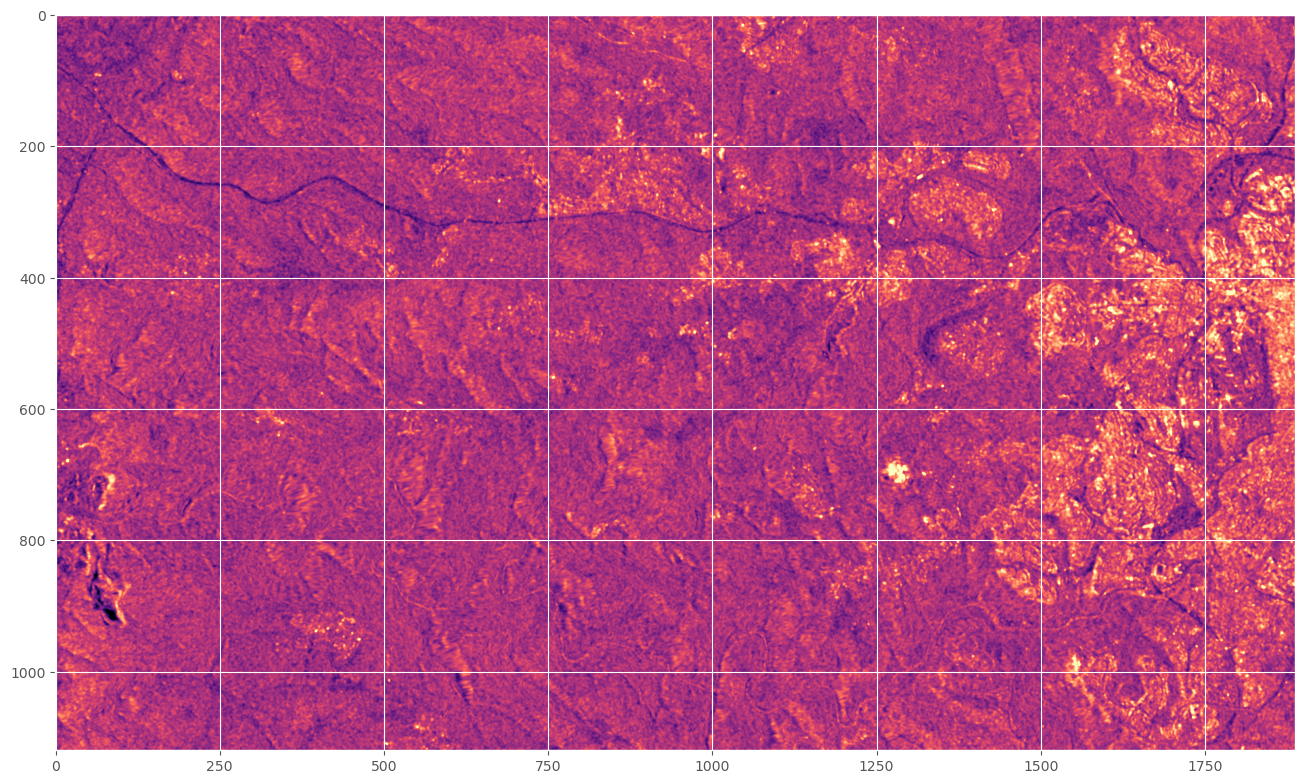

In [9]:
plt.imshow(s1_rasterize[:, :, 0], vmin= -20, vmax= 5, cmap="magma")
#plt.gcf().set_size_inches(6, 6)

### Sentinel_1, selecting second band

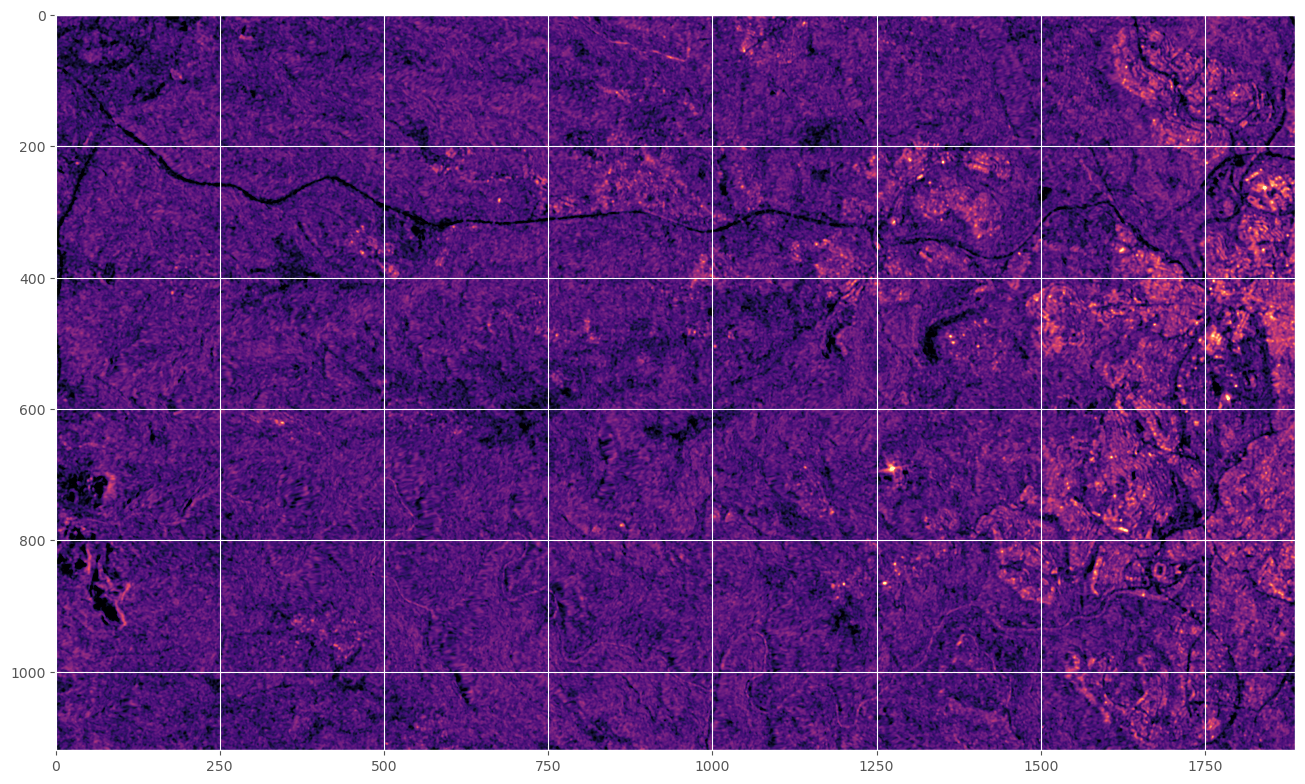

In [10]:
plt.imshow(s1_rasterize[:, :, 1], vmin= -20, vmax= 5, cmap="magma")
# plt.gcf().set_size_inches(6, 6)

## 2. Visualization of the LABELS
- Visualizing the labels which contains the <b>building density</b> range from `0-100m^2` per pixel
- here, the range `0-100m^2`, the `brighter` pixel, the more AREA region are covered by structure

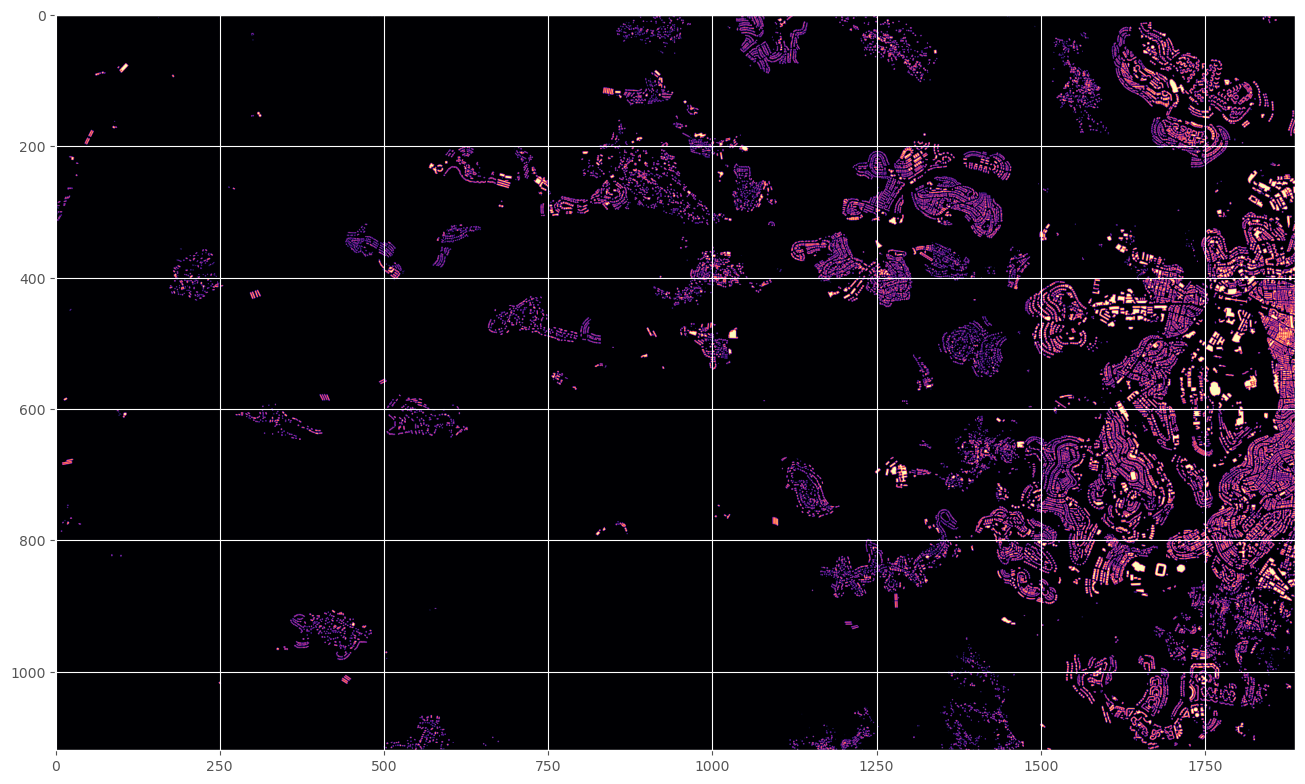

In [11]:
plt.imshow(label_data[:, :, 0], vmin= 0, vmax= 100, cmap="magma")
# plt.gcf().set_size_inches(10, 8)

## 3. Visualizing the Hyperspectral images
- It can be challenging task to work with `hyperspectral` images than working with `RGB` image which has 0-256 range
- `Hyperspectral` image comes with 16 bit image, so it is important to select the right BAND and process before visualizing it


### Trimming the outliers
- We clip top and bottom 2% of the image array by `trimming` the data to normalize the outliers

In [12]:
def clip_quantiles(arr, q_min= 0.02, q_max= 0.98):
    return np.clip( arr, 
                  np.nanquantile(arr, q_min), 
                  np.nanquantile(arr, q_max))

## Transormation of Sentinel to RGB image
- Transformming the raster image of 16 bits to 8 bits
- To transform 16 bits to 8 bit RGB rendering we normalize the LAYER by dividing with MAX value from the image and round up to nearest integer

In [13]:
def render_s2_to_rgb(arr):
    ## if nodata values, we CAST all values to zeros
    if np.ma.isMaskedArray(arr):
        arr= np.ma.getdata(arr.filled(0))

    ## Select only Red, Blue, Green from the BANDS
    rgb_slice= arr[:, :, 0:3]

    ## Clip the data by quantiles, so the RGB render is not Stretched to outliers
    ## this can result in dark images
    for c in [ 0, 1 , 2]:
        rgb_slice[:, :, c]= clip_quantiles(rgb_slice[:, :, c])

    ## Currently, the slice has 16 bits, we want to transform to 8 bit RGB render
    ## 1. we normalize the LAYER by dividing with MAX value from the image
    ## 2. we multiply by 255 (max of 8 bit) which ranges from 0-255, this will normalize
    ## within the RGB range
    for c in [0, 1, 2]:
        rgb_slice[:, :, c]= (rgb_slice[:, :, c] / rgb_slice[:, :, c].max()) * 255.0

    ## Third, we will ROUND-UP to nearest integer and cast to uint8
    rgb_slice= np.rint(rgb_slice).astype(np.uint8)

    return rgb_slice

### Transformation of Sentinel-2 bands with `buteo` library
- transformation of Sentinel-2 `tiff` fil to array
- Selecting specific channel bands; 1, 2, 3

In [14]:
converted_s2_to_rgb= beo.raster_to_array("data/s2_3.tif",
                                         bands= [1, 2, 3])
# plt.imshow( converted_s2_to_rgb)

ValueError: Unable to locate input data. ['data/s2_3.tif']

### Example; Transforming Sentinel of 16 bit -> 8 bit RGB
- Here, we first convert the Rasterize image to Array and then render the array to RGB

In [ ]:
%%time
plt.imshow( render_s2_to_rgb(s2_rasterize))
# plt.gcf().set_size_inches(8, 8)

## 4. Visualizing DEM data
- DEM data contains total of 4 channels including the information of the elevation
- First three channels provides information of the slope and actual slope itself.
    - first 2 channels store the direction (aspect in sin/cos) the slope is facing
    - 3rd channel has the actual slope
    - 4th channel includes the actual elevation

    - Note: Plotting these channels results in an aspect-slope image.

In [ ]:
sample= dem_rasterize.copy()
for j in range(0, 3):
    sample[:, :, j]= sample[:, :, j] / sample[:, :, j].max()

plt.imshow(sample[:, :, 0:3])
plt.gcf().set_size_inches(9, 6)

## DEM; 4th channel; elevation profile
- getting the values from the Fourth BAND
- Here, 4th channel reflects the elevation information, this has been Normalized to the height of Mt. Everest

In [ ]:
plt.imshow(dem_rasterize[:, :, 3]/ dem_rasterize[:, :, 3].max(), cmap="viridis")

### DEM; `SLOPE`
- selecting the Second channel

In [ ]:
plt.imshow(dem_rasterize[:, :, 2] / dem_rasterize[:, :, 2].max(), cmap= 'viridis')

# Data Preparation for input to Train the model
   For this task, as we know Computer Vision requires the processing of `LARGE` amounts of image data. This can be challenging when dealing with high-resolution images containing `millions of pixels`

**METHOD**
- We can divide `IMAGE` into smaller `sub-regions` or `patches`. These patches can be retrieved or extracted from the existing image by applying `sliding` windows or by randomly selecting `regions` of the image.
- We will use `butteo` library to generate `PATCHES` from which we can `group` them into Batches. These `Batches` are then feed into our CNN model during training.
- One major advantage of `generating patches` allows us to reduce the computation memory that is required to process the image data

### EXAMPLE; generating patches from an image
- To generate patches for a single image, we can select size of the resulting patches, this can automatically create offsets

In [ ]:
patches_label= beo.array_to_patches(label_data, 64)
patches_s1_arr= beo.array_to_patches(s1_rasterize, 64)
patches_s2_arr= beo.array_to_patches(s2_rasterize, 64)
patches_dem= beo.array_to_patches(dem_rasterize, 64)

print("Shape of the patches generated:\n")
print("original patch labels: ", patches_label.shape)
print("patch labels of Sentinel-1 shape: ", patches_s1_rgb.shape)
print("patch labels of Sentinel-2 shape: ", patches_s2_rgb.shape)
print("patches labels of DEM shape: ", patches_dem.shape)

### Interpolation of the image
- new batch transformation created 1972 images with height 64 and width 64
- interpolation is set explicit to nearest, thus, smoothing at pixel level does not help in this process

### selected sub-region based on index

In [ ]:
def select_sub_region(index_):
    fig, ax= plt.subplots(nrows=2, ncols= 2, figsize=(10, 10))

    ## interpolation
    ax[0,0].imshow(patches_label[int(index_), :, :, 0], cmap="magma", interpolation="nearest")
    ax[0,0].set_title("Label data", fontsize= 11)

    ## sentinel- 1
    ax[0,1].imshow(patches_s1_arr[int(index_), :, :, 1], cmap= "magma", interpolation="nearest")
    ax[0,1].set_title("Rendered Sentinel-1", fontsize= 11)
    
    ## Render to 8 bit with `nearest` interpolation, thus, smoothing at PIXEL not helpful
    ax[1,0].imshow(render_s2_to_rgb(patches_s2_arr[int(index_), :, :, :]), interpolation="nearest");
    ax[1,0].set_title("Rendered Sentinel-2", fontsize= 11)
    
    ## DEM; 4 channel bands
    ax[1,1].imshow(patches_dem[int(index_), :, :, 1], cmap= "magma", interpolation="nearest")
    ax[1,1].set_title("Rendered DEM", fontsize= 11)
    
    plt.gcf().set_size_inches(8, 8)

In [ ]:
select_sub_region(500)

### other Patches

In [ ]:
select_sub_region(460)

In [ ]:
select_sub_region(16)

In [ ]:
select_sub_region(200)